# Multiple Fleets -- Figures, Feb 28 2023 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from matplotlib.ticker import FuncFormatter

In [2]:
path = 'H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/'
path_data = path + 'data/'
path_output = path + 'plots/'

In [3]:
#df_lorenz = pd.read_csv('C:/Users/annik/tmpOnATBcomputer/sf_2018_stacked_rh_fltsz_price_1.csv')
#df_lorenz = pd.read_csv('H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/data/mult_fleets/sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')
#df_lorenz = pd.read_excel(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_modifiedLeverNumbers.csv')
df_lorenz = pd.read_csv(path_data + 'sf_2018_stacked_rh_fltsz_price_incRank_1_2_3test.csv')
df_lorenz = df_lorenz.loc[(df_lorenz['lever_position_price']<=99)]
df_lorenz['mode_transit_sum'] = df_lorenz['mode_bike_transit_sum'] + df_lorenz['mode_drive_transit_sum']+df_lorenz['mode_walk_transit_sum']

In [4]:
df_lorenz['mode_car_total_sum']=df_lorenz['mode_car_sum']+df_lorenz['mode_hov3_teleportation_sum']+df_lorenz['mode_car_hov3_sum']+df_lorenz['mode_hov2_teleportation_sum']+df_lorenz['mode_car_hov2_sum']
#print(df_lorenz.groupby(['incRank'])['n_trips'].sum())
df_lorenz['n_trips_total']=df_lorenz['mode_bike_sum']+df_lorenz['mode_walk_sum']+df_lorenz['mode_car_total_sum']+df_lorenz['mode_transit_sum']
#print(df_lorenz.groupby(['incRank'])['n_trips_total','n_trips'].sum()) 

df_lorenz['Ridehail share (total)']= df_lorenz['mode_ridehail_total_sum']/df_lorenz['n_trips']
df_lorenz['Ridehail share (solo)']= df_lorenz['mode_ride_hail_solo_sum']/df_lorenz['n_trips']
df_lorenz['Ridehail share (pooled)']= df_lorenz['mode_ride_hail_pooled_sum']/df_lorenz['n_trips']
df_lorenz['Transit share']= df_lorenz['mode_transit_sum']/df_lorenz['n_trips']
df_lorenz['Car share']= df_lorenz['mode_car_total_sum']/df_lorenz['n_trips']

In [5]:
#sns.heatmap(df_lorenz.isnull(),            yticklabels=False,             cbar=False,             cmap='viridis')
 #g = sns.heatmap(data,linewidth=0,yticklabels=yticks,xticklabels=xticks)
  #  g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)

# rename so they're pretty
But also keep the original var name -- 
To make it easy to refer to!

### once they are renamed, they are the same variable BUT WITH out the '  or "

In [6]:
df_lorenz['Income Rank (Percentiles of Income)'] = df_lorenz['incRank']*5
df_lorenz = df_lorenz.rename(columns = {'incRank': "Income Rank (Ventiles (20tiles) of Income)",
                                        'lever_position_price':"Price Multiplier",
                                        'lever_n_fleets': "Number of Fleets",
                                        'lever_position_fltsz': "Total Fleet Size Multiplier"
                                       })
#df_lorenz = df_lorenz.reset_index(drop=False)
# keep local variables that are the same name as original variables
incRank =  "Income Rank (Percentiles of Income)"
lever_position_price = "Price Multiplier"
lever_n_fleets = "Number of Fleets"
lever_position_fltsz = "Total Fleet Size Multiplier"

df_lorenz[incRank].sum()

36750

In [7]:
#df_lorenz.info()
#print(df_lorenz.columns.tolist())
#print(df_lorenz.columns.values)

In [8]:
s1 = 22
m1 = 16
#sns.set(rc={'figure.figsize':(20,14)})
#sns.set_theme(style="whitegrid")

#custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style="whitegrid", 
              font_scale=3,
              rc={'figure.figsize':(20,14)}
             )


#plt.rcParams['xtick.major.size'] = 20
#sns.set_style('white', rc={
#    'xtick.bottom': True,
#    'ytick.left': True,
#})

### Baseline Definition
Define what the baseline is

In [113]:
df_lorenz["theNumber1"] = 1
df_lorenz["baseline2"] = df_lorenz["theNumber1"].where( df_lorenz[lever_position_price].eq(1.0) 
                                                     & df_lorenz[lever_position_fltsz].eq(1.0) 
                                                     & df_lorenz[lever_n_fleets].eq(2.0),
                                                     0)
df_lorenz["baseline5"] = df_lorenz["theNumber1"].where( df_lorenz[lever_position_price].eq(1.0) 
                                                     & df_lorenz[lever_position_fltsz].eq(1.0) 
                                                     & df_lorenz[lever_n_fleets].eq(5.0),
                                                     0)
df_lorenz["aWord"]=" "
df_lorenz["Baseline: 2 Fleets"] = df_lorenz["aWord"].where( df_lorenz['baseline2']!=1,"Baseline (2 Fleets)" )
df_lorenz["Baseline: 5 Fleets"] = df_lorenz["aWord"].where( df_lorenz['baseline5']!=1,"Baseline (5 Fleets)" )
baseline2label = 'Baseline: 2 Fleets'
baseline5label = 'Baseline: 5 Fleets'

Label baseline

Make a Relative to Baseline variable if you want to

In [114]:
# CHOOSE which to make relative to baseline
temp_varName = "Potential_INEXUS_mean" # Potential_INEXUS_mean
temp_varNameRel = "Potential INEXUS, relative to baseline" # 
temp_varNameRelPct = 'Potential INEXUS, percent relative to baseline'
# I DON'T ACTUALLY THINK PERCENT RELATIVE TO BASELINE MAKES SENSE FOR INEXUS??? Closer to 0?
df_lorenz['temp_varName_baseOnly2'] = df_lorenz[temp_varName].where(df_lorenz['baseline2']==1) # only not NA if it's at baseline
df_lorenz['temp_varName_base2'] = df_lorenz.groupby([incRank])['temp_varName_baseOnly2'].transform('max')
df_lorenz[temp_varNameRel+'2']=df_lorenz[temp_varName]-df_lorenz['temp_varName_base']
df_lorenz[temp_varNameRelPct+'2']=(df_lorenz[temp_varName]-df_lorenz['temp_varName_base'])/(-df_lorenz['temp_varName_base'])
df_lorenz['temp_varName_baseOnly5'] = df_lorenz[temp_varName].where(df_lorenz['baseline5']==1) # only not NA if it's at baseline
df_lorenz['temp_varName_base5'] = df_lorenz.groupby([incRank])['temp_varName_baseOnly5'].transform('max')
df_lorenz[temp_varNameRel+'5']=df_lorenz[temp_varName]-df_lorenz['temp_varName_base']
df_lorenz[temp_varNameRelPct+'5']=(df_lorenz[temp_varName]-df_lorenz['temp_varName_base'])/(-df_lorenz['temp_varName_base'])

#df_lorenz.groupby(["incRank"])[temp_varName].describe()
#df_lorenz.groupby(["incRank"])['temp_varName_base'].describe()
#df_lorenz[['baseline',incRank,temp_varNameRel,temp_varNameRelPct,'temp_varName_base','incomeInThousands_mean','Potential_INEXUS_mean','temp_varName_baseOnly','temp_varName_base',temp_varNameRel,lever_n_fleets, lever_position_fltsz,lever_position_price]].head(58)

## format percentages 

In [11]:
#df_lorenz.style.format({
    #'var2': '{:,.2f}'.format,
#    temp_varNameRelPct: '{:,.2%}'.format,
#})

# Graph INEXUS

## by fleetsize

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/Potential INEXUS, percent relative to baseline_Income Rank (Percentiles of Income)_fleetsize__03_06_2023_16_06_16


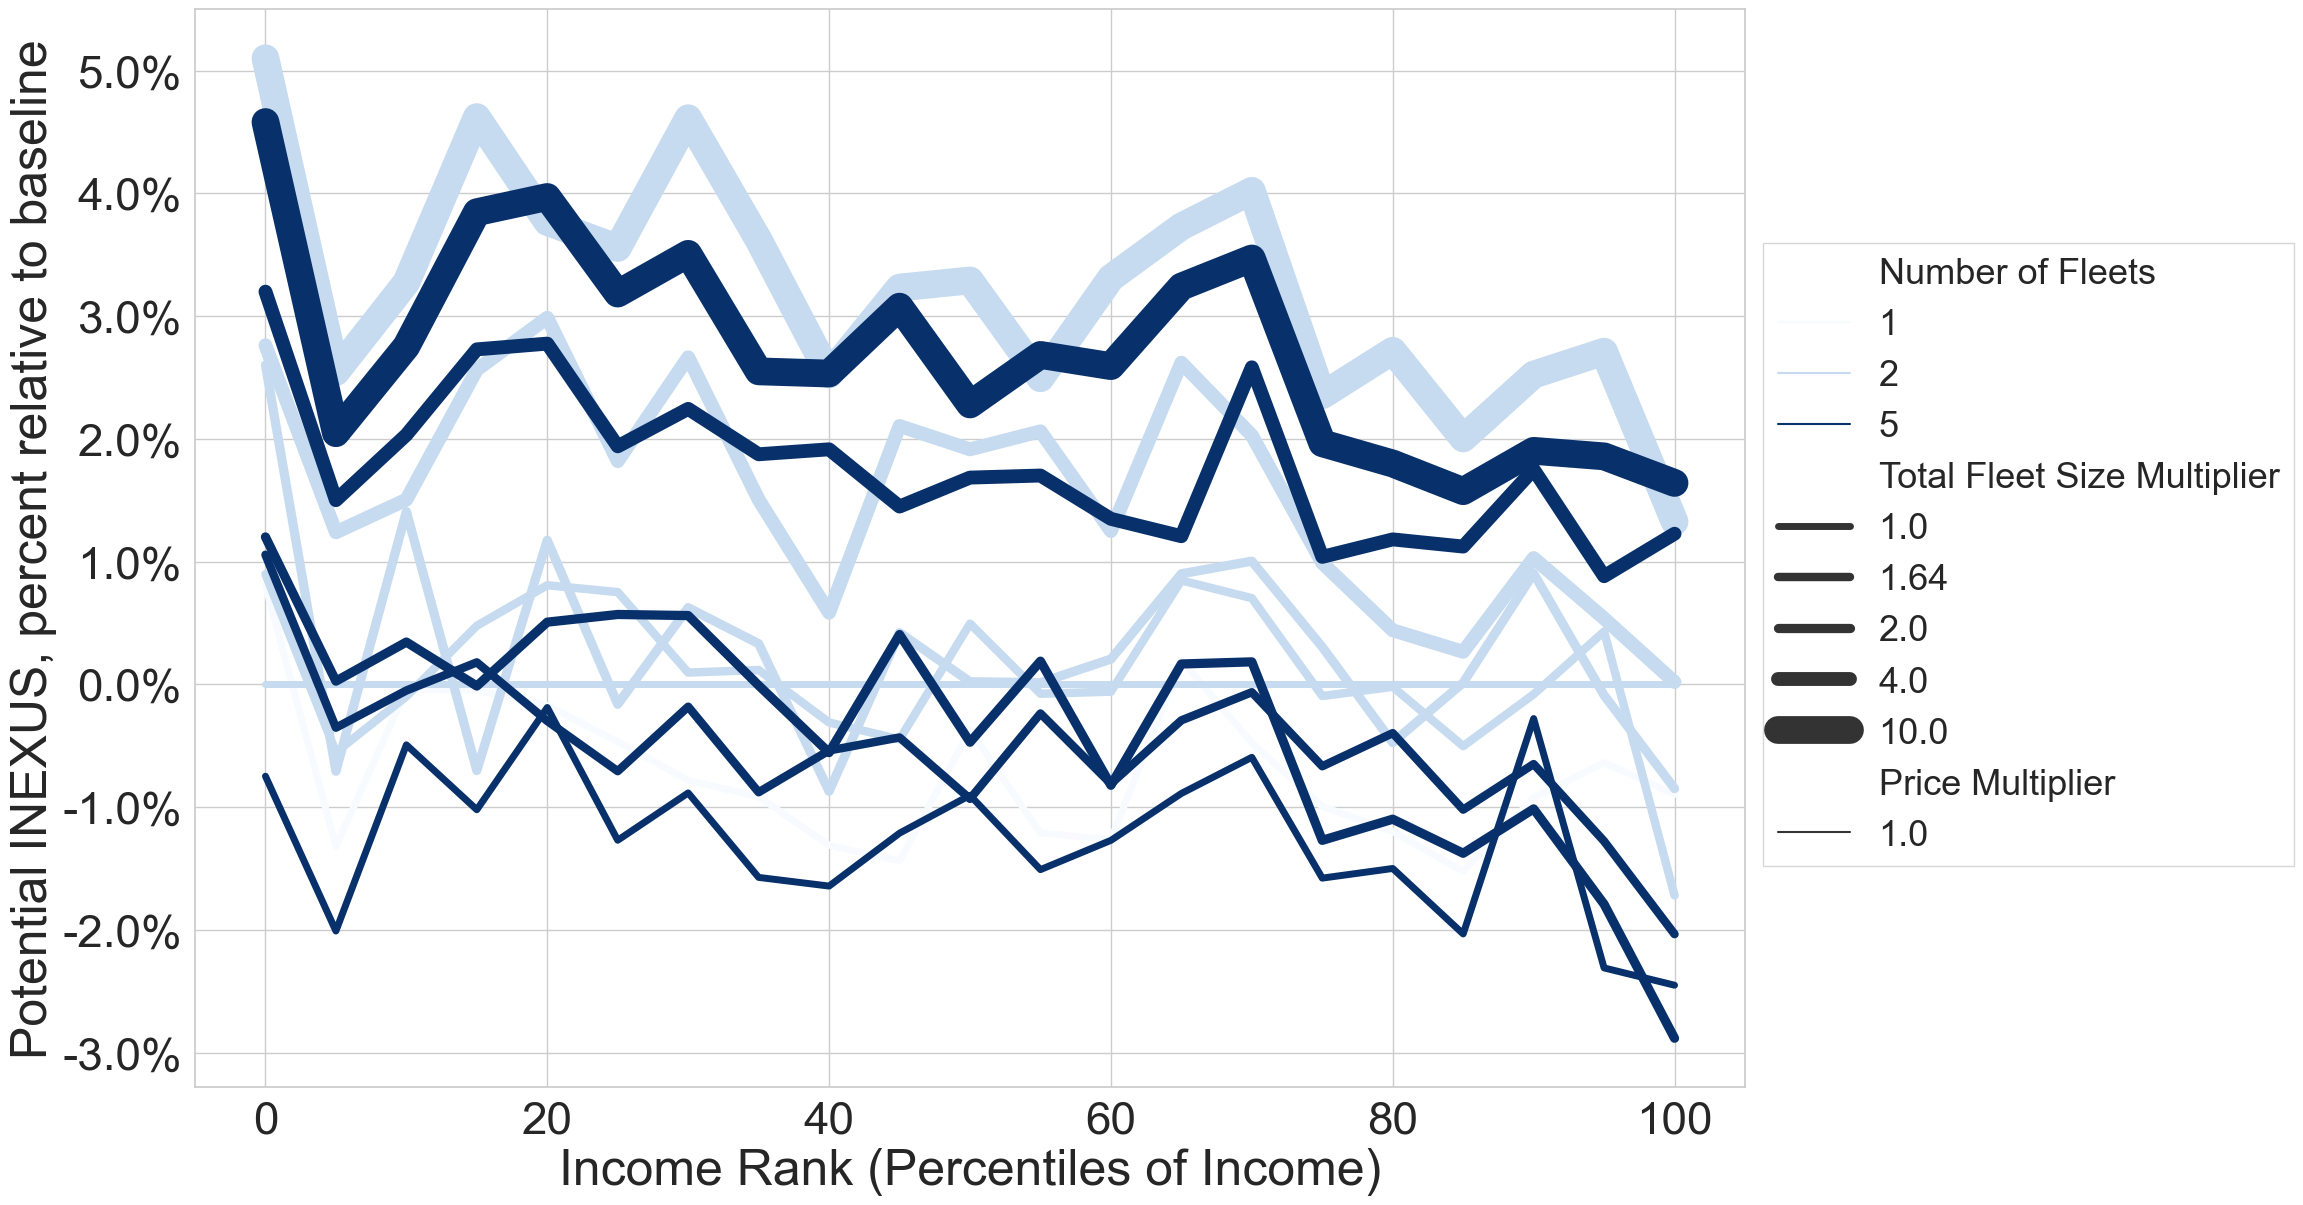

In [12]:
#Y var
y_var = temp_varNameRelPct
# X var
x_var = incRank
graph_Data = df_lorenz.loc[ (df_lorenz[lever_position_price]==1)
                           &(df_lorenz[lever_position_fltsz]>=-1)
                           &(df_lorenz[lever_n_fleets]>=0)]
t_plot = sns.lineplot(data = graph_Data, x = x_var, y = y_var, ci=None, linewidth = 6,
            size =lever_position_fltsz, sizes=(5,20), hue = lever_n_fleets, style = lever_position_price,
            palette = 'Blues')
t_plot.yaxis.set_major_formatter(formatter='{:,.1%}'.format)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE
import datetime
now = datetime.datetime.now()
filename  = path_output + y_var + "_" + x_var + "_fleetsize__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') 
print(filename)
plt.savefig(filename+'.svg', format='svg')
plt.savefig(filename+'.png', dpi=300) # Nazanin -- 1000

## by price

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/Potential INEXUS, percent relative to baseline2_Income Rank (Percentiles of Income)_price__03_06_2023_22_16_44


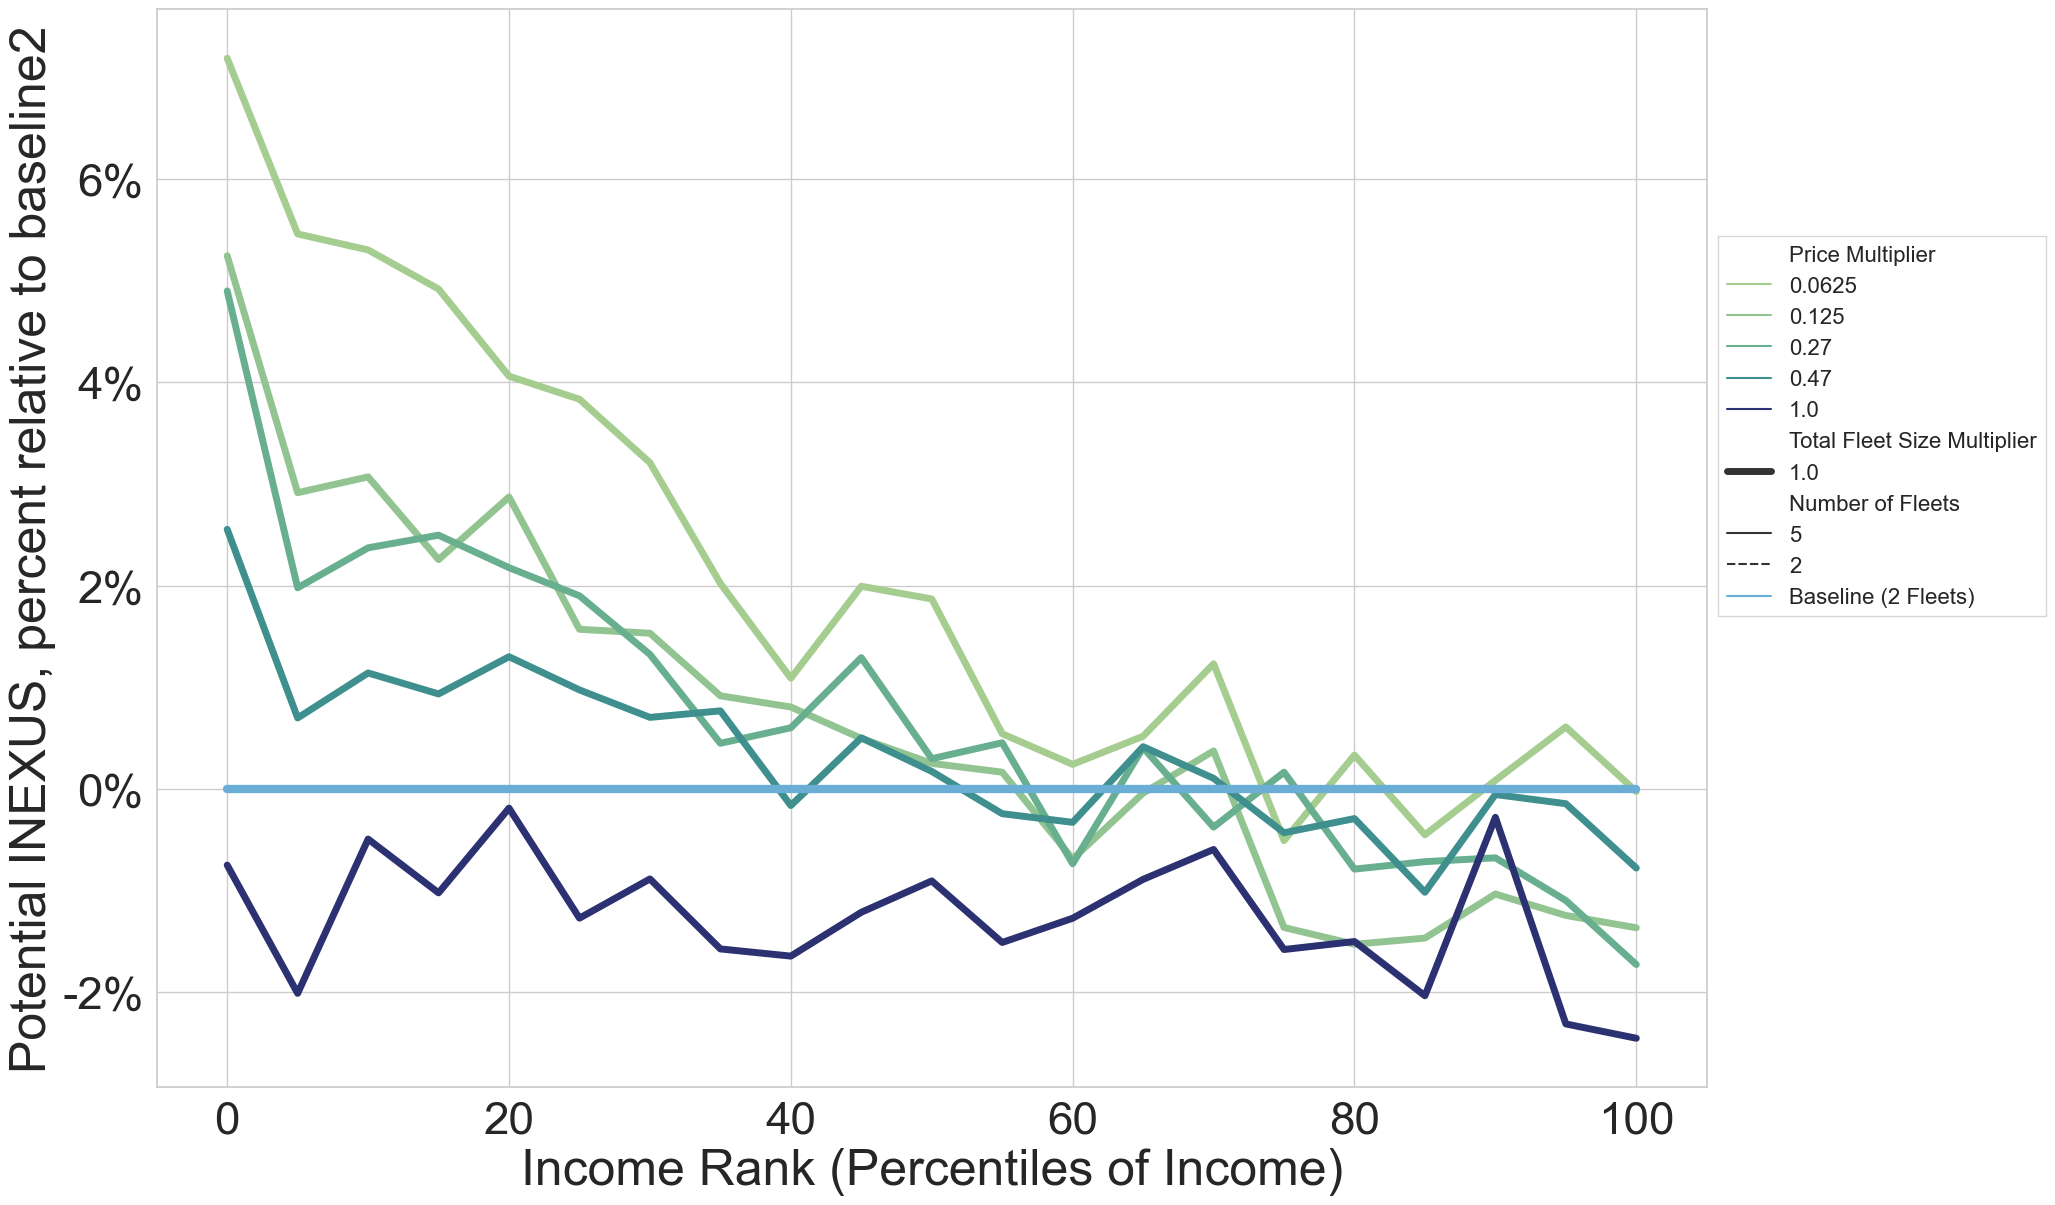

In [121]:
# X and Y var
y_var = temp_varNameRelPct+'2'
x_var = incRank
# baseline
base2_or_5 = "baseline2"
base2_or_5lable = baseline2label
# data
graph_Data = df_lorenz.loc[((df_lorenz[lever_position_price]>=-1)&(df_lorenz[lever_position_fltsz]==1)
                           &((df_lorenz[lever_n_fleets      ]==5)|(df_lorenz[lever_n_fleets      ]==0)))
                           | (df_lorenz[base2_or_5]== 1)                        ]
# graph
t_plot = sns.lineplot(data = graph_Data, x = x_var, y = y_var, ci=None, linewidth = 6,
            size =lever_position_fltsz, sizes=(5,20), hue = lever_position_price, style=lever_n_fleets,style_order=(5,2),
            palette = 'crest')
t_plot = sns.lineplot(data = df_lorenz.loc[(df_lorenz[base2_or_5]==1)], x = x_var, y = y_var, ci=None, linewidth = 6,
            hue = base2_or_5lable,             palette = 'Blues')
t_plot.yaxis.set_major_formatter(formatter='{:,.0%}'.format)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'upper left', prop={'size': 16})

# save
import datetime
filename  = path_output + y_var + "_" + x_var + "_price__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') 
print(filename)
plt.savefig(filename+'.svg', format='svg')
plt.savefig(filename+'.png', dpi=300) # Nazanin -- 1000

# Graph Mode

## by fleetsize w transit (not working)

H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/mode_transit_sum__03_06_2023_16_06_19.svg


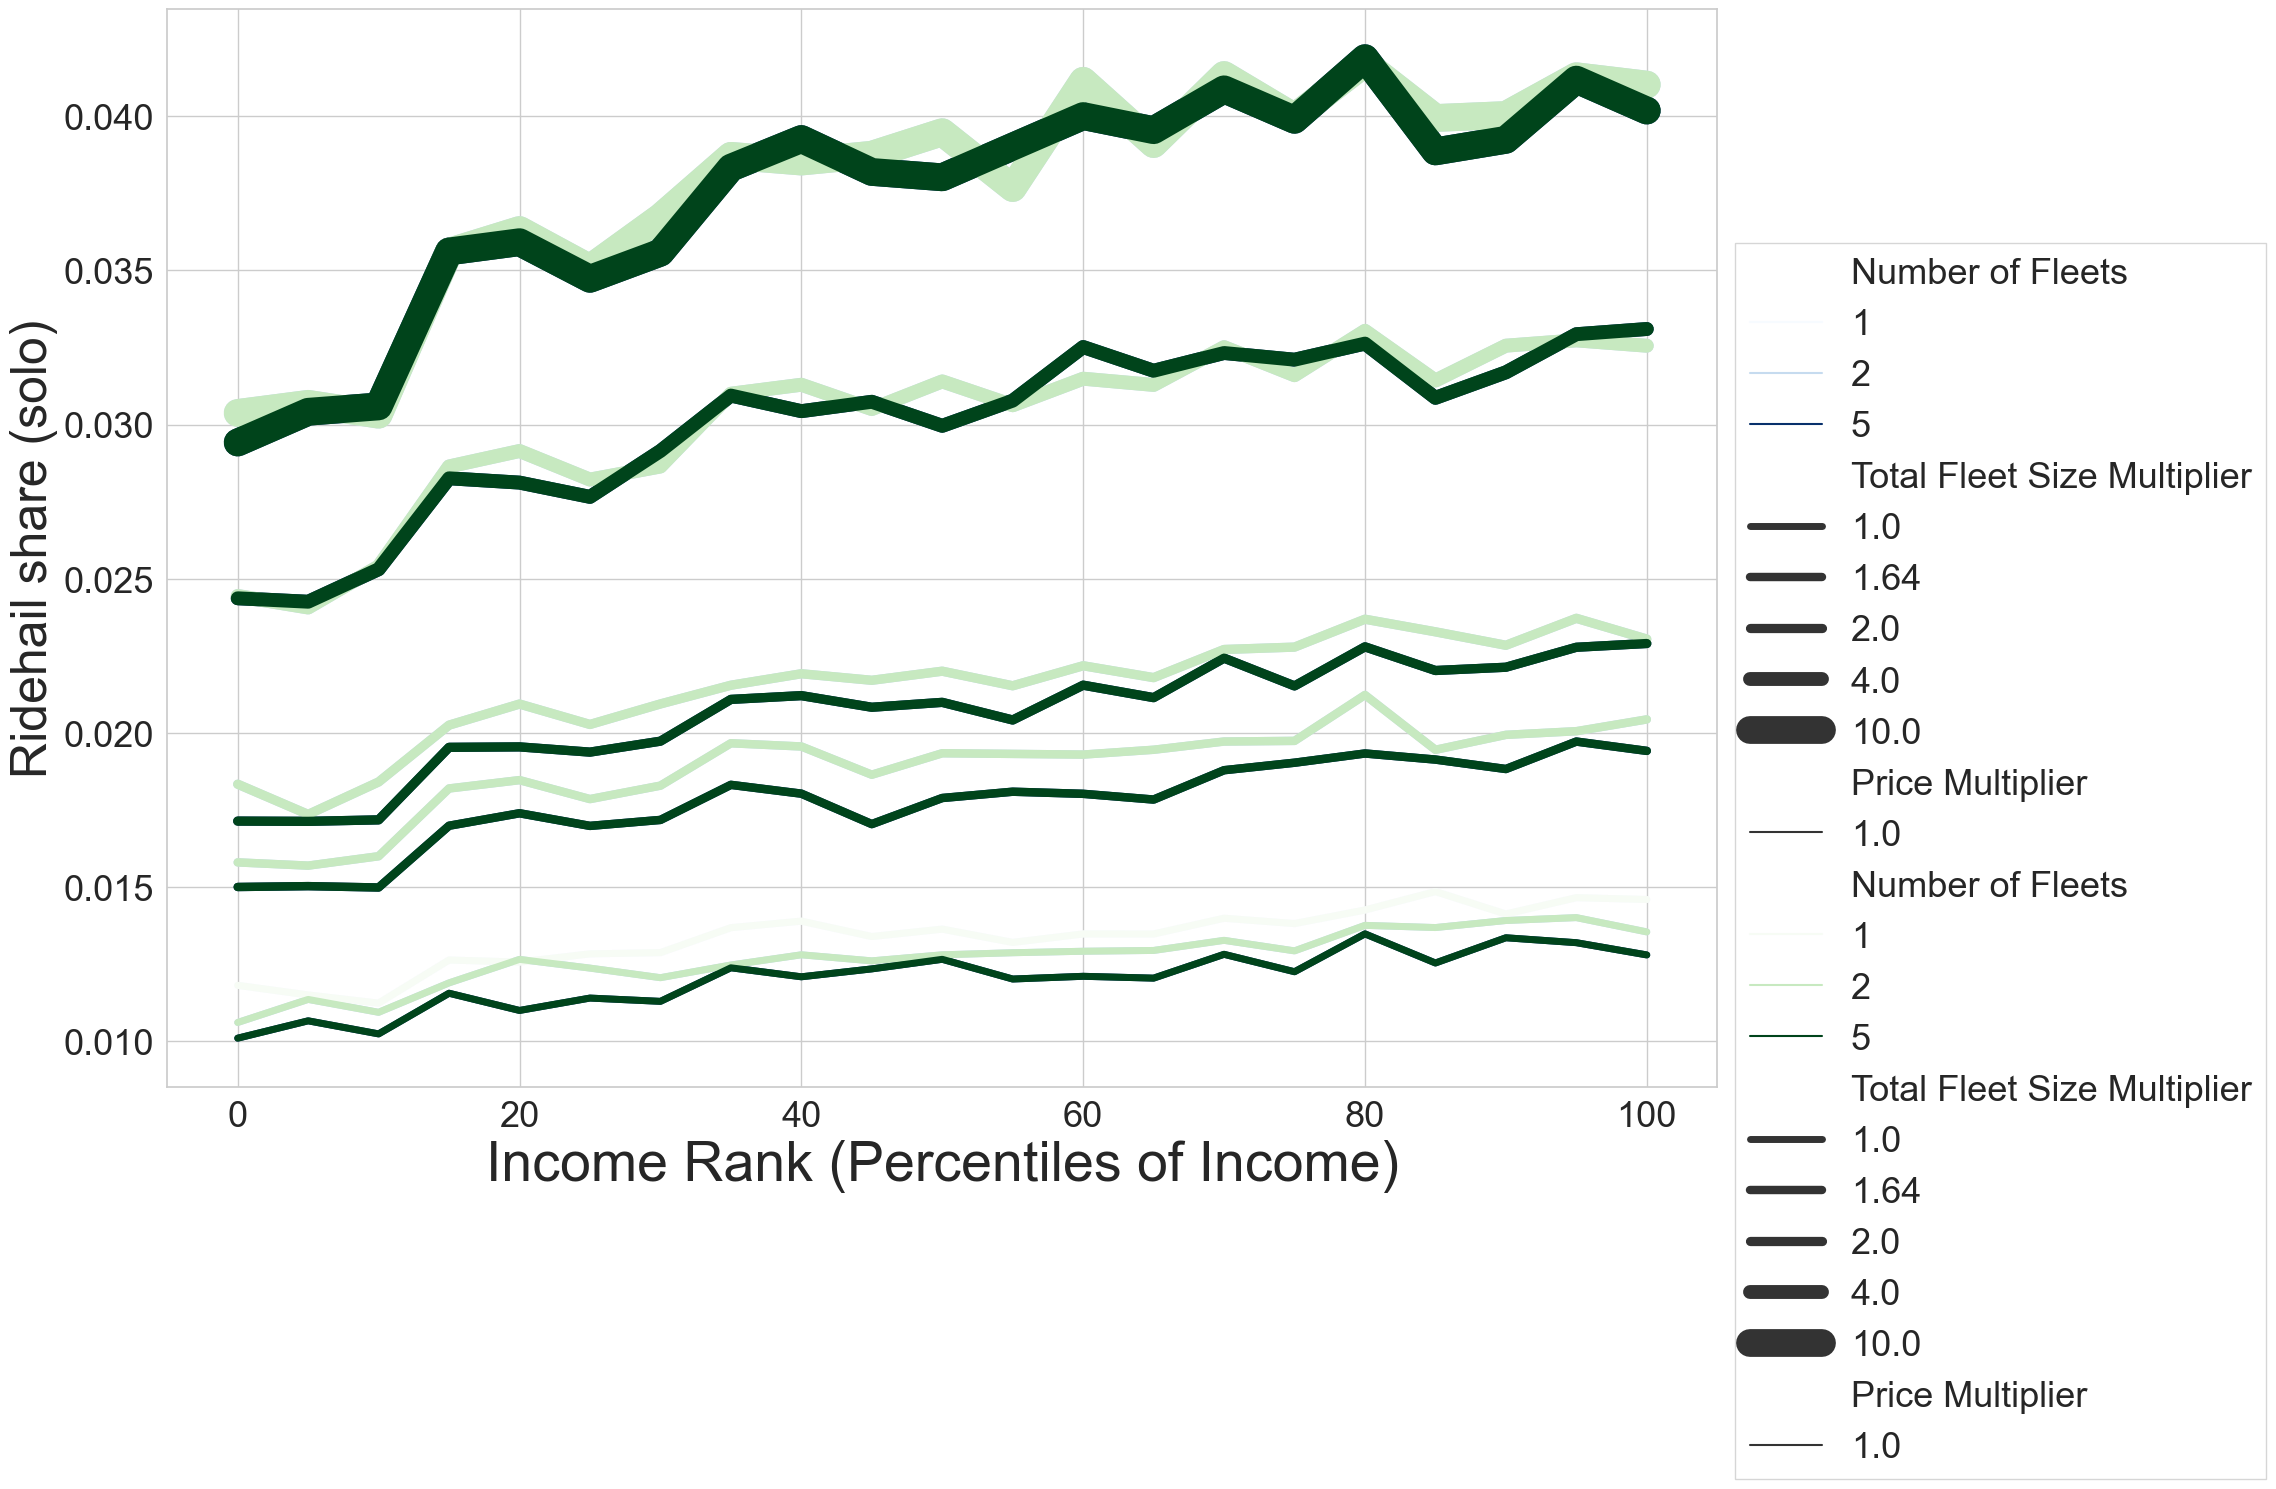

In [14]:
# X and Y var
y_var = 'Ridehail share (solo)' # Ridehail share (total) , Ridehail share (solo) , Ridehail share (pooled)'
x_var = incRank
# baseline
base2_or_5 = "baseline2"
base2_or_5lable = baseline2label
# data
graph_Data = df_lorenz.loc[(df_lorenz[lever_position_price]==1)&(df_lorenz[lever_position_fltsz]>=1)
                           &(df_lorenz[lever_n_fleets      ]>=-1)]
# graph
t_plot = sns.lineplot(data = graph_Data, x = x_var, y = y_var, ci=None, linewidth = 6,
            size =lever_position_fltsz, sizes=(5,20), hue = lever_n_fleets, style = lever_position_price,
            palette = 'Blues')
y_variable = 'mode_transit_sum' # mode_ride_hail_solo_sum  mode_transit_sum  mode_ride_hail_pooled_sum mode_ride_hail_solo_sum mode_ridehail_total_sum 
t_plot = sns.lineplot(data = graph_Data, x = x_var, y = y_var, ci=None, linewidth = 6,
            size =lever_position_fltsz, sizes=(5,20), hue = lever_n_fleets, style = lever_position_price,
            palette = 'Greens')
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
#t_plot.set_ylabel( fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
# SAVE

import datetime
now = datetime.datetime.now()
filename  = path_output + y_var + "_" + x_var + "__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)
plt.savefig(filename, format='svg')
plt.savefig(filename+'.png', dpi=300) # Nazanin -- 1000

## Mode by price 
This is re-doing Nazanin's plot

AxesSubplot(0.125,0.11;0.775x0.77)
H:/.shortcut-targets-by-id/1xuAay2JQWDmg2wb0MD2Ft4mCSjufwjq3/BEAM CORE - LBNL NREL Collaboration/Task4 Deep Dive Analyses/3. Fleet Size -- and Multiple Fleets paper/plots/Potential INEXUS, percent relative to baseline_Income Rank (Percentiles of Income)_ReproduceNazanins__03_06_2023_21_57_14.svg


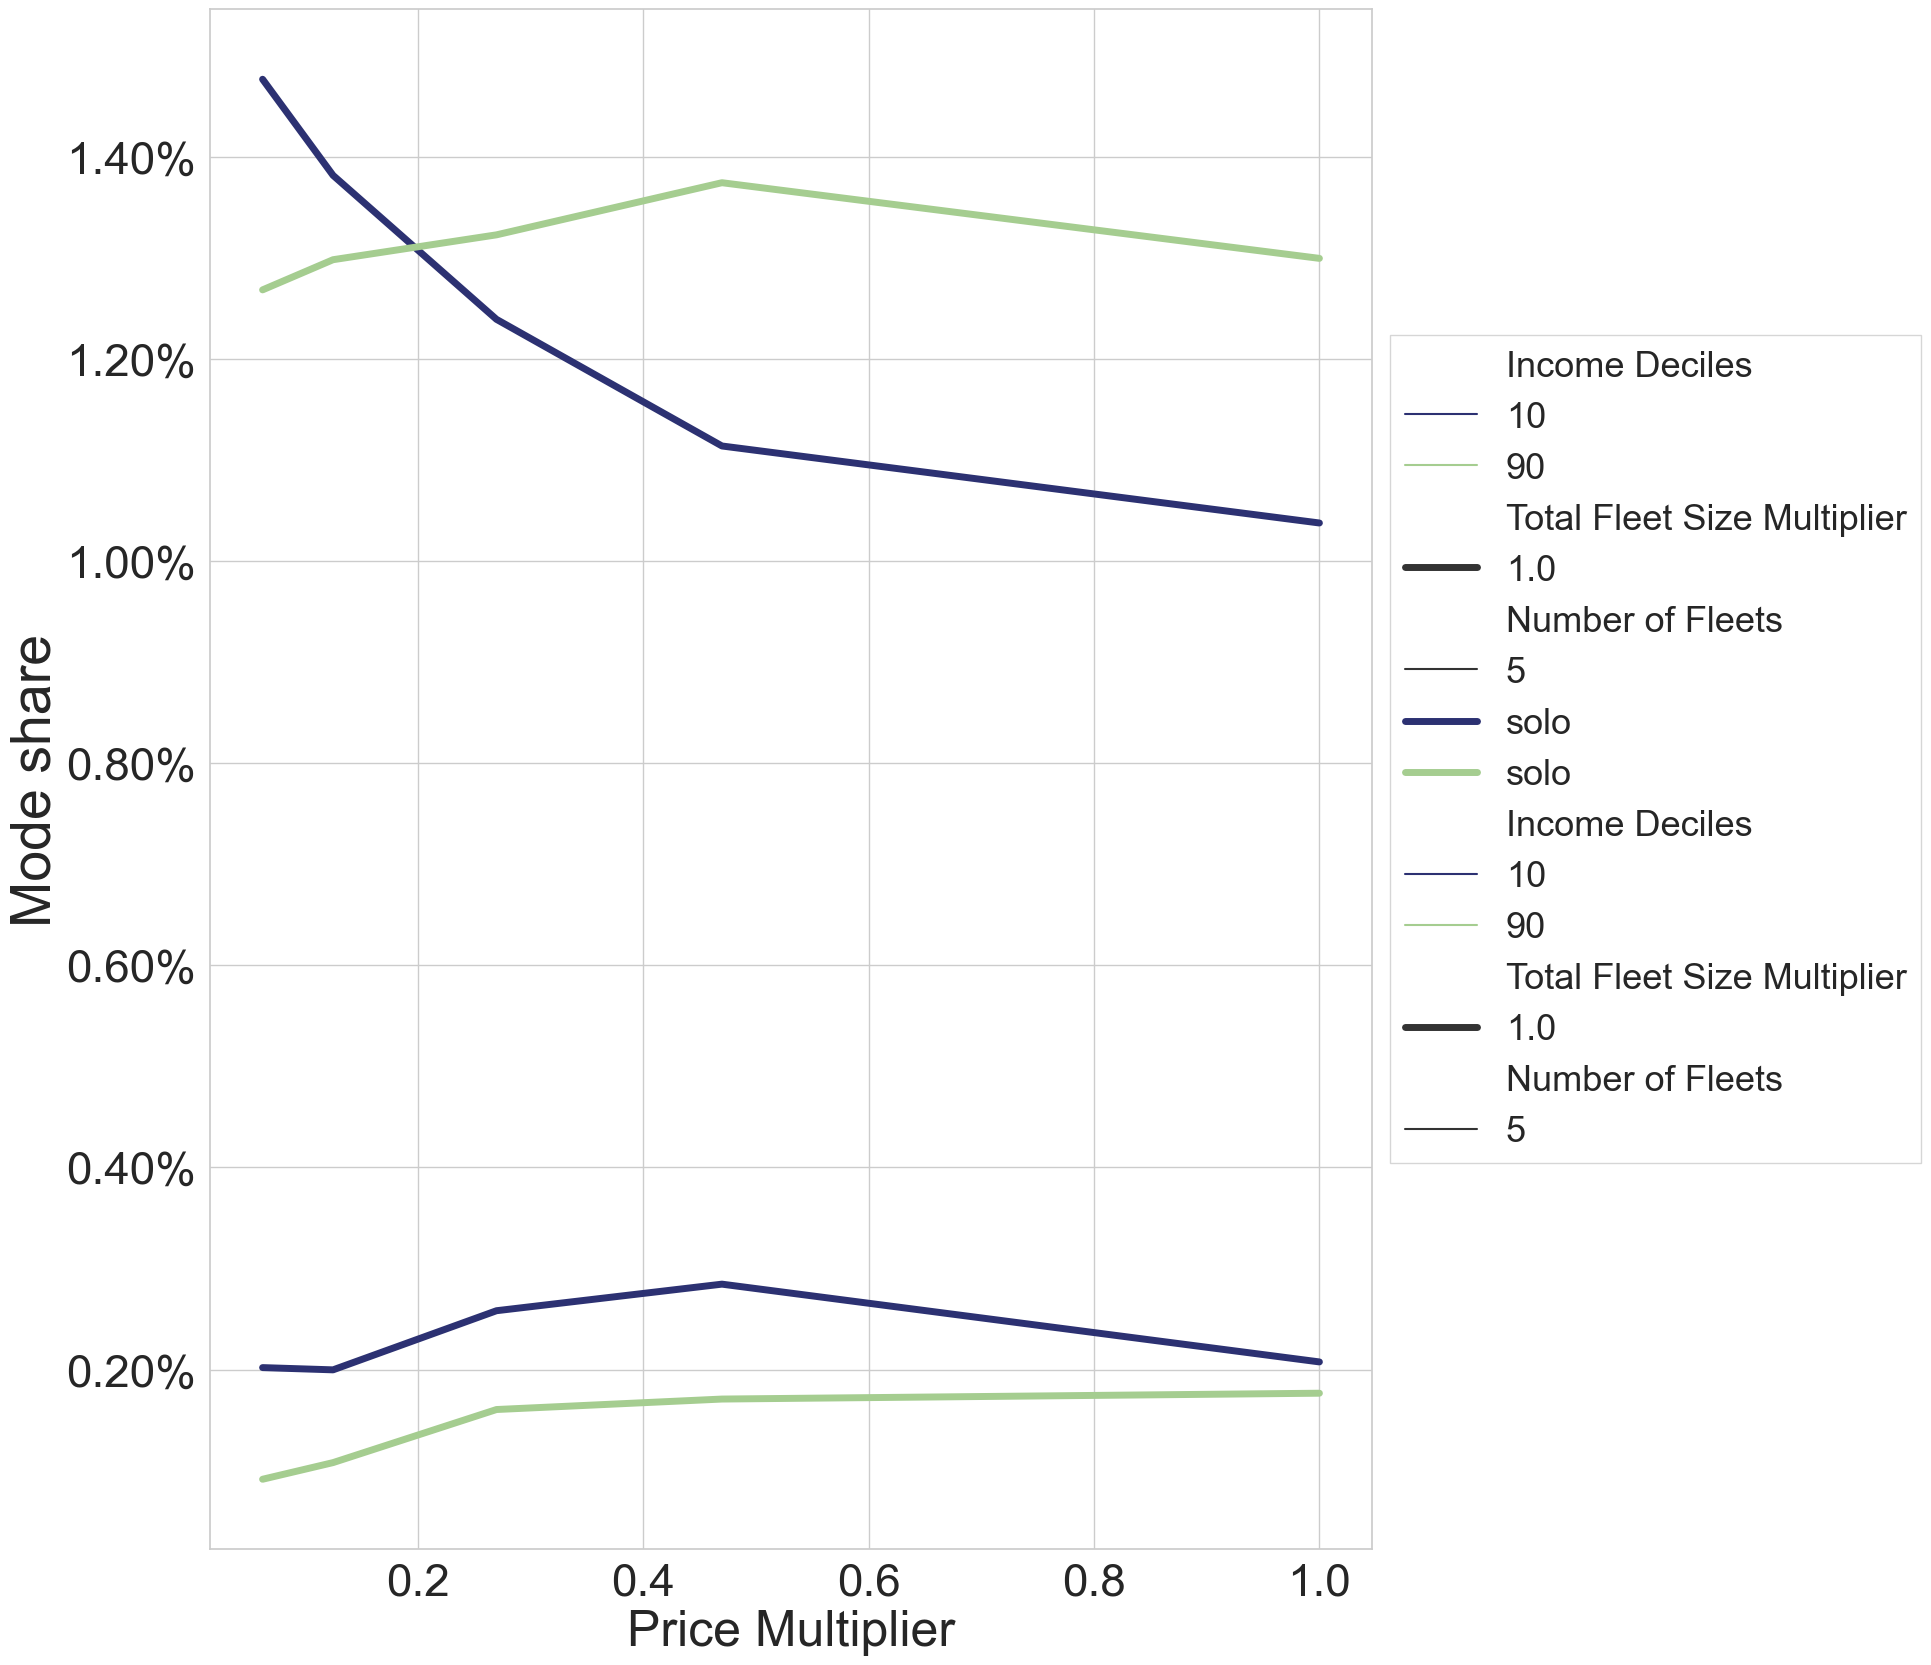

In [100]:
graph_Data = df_lorenz.loc[(  (df_lorenz[lever_position_price]>=-1)&(df_lorenz[lever_position_fltsz]==1)
                             &(df_lorenz[lever_n_fleets      ]==5)
                               &((df_lorenz[incRank]<10)|(df_lorenz[incRank]>90)))] 
df_lorenz['Income Deciles'] = 10
df_lorenz['Income Deciles'] = df_lorenz['Income Deciles'].where(df_lorenz[incRank]<10,90)
df_lorenz['Income Deciles'] = df_lorenz['Income Deciles'].where((df_lorenz[incRank]>90)|(df_lorenz[incRank]<=10),-5)
y_variable = 'Ridehail share (pooled)' # pooled  solo total     
x_variable = lever_position_price
t_plot = sns.lineplot(data = graph_Data, x = x_variable, y = y_variable, ci=None, linewidth = 6,          
            size =lever_position_fltsz, sizes=(5,20), hue = 'Income Deciles', style = lever_n_fleets,
            palette = 'crest_r')
y_variable = 'Ridehail share (solo)' # pooled  solo total     
t_plot = sns.lineplot(data = graph_Data, x = x_variable, y = y_variable, ci=None, linewidth = 6,          
            size =lever_position_fltsz, sizes=(5,20), hue = 'Income Deciles', style = lever_n_fleets,
            palette = 'crest_r', label = "solo")
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
t_plot.yaxis.set_major_formatter(formatter='{:,.2%}'.format)
#t_plot.figure.figsize=(20,14)
t_plot.set_ylabel('Mode share', fontsize = 40)
t_plot.figure.set_figwidth(15)
t_plot.figure.set_figheight(20)
print(t_plot)
# SAVE
import datetime
filename  = path_output + y_var + "_" + x_var + "_ReproduceNazanins__" + datetime.datetime.now().strftime('%m_%d_%Y_%H_%M_%S') + '.svg'
print(filename)
plt.savefig(filename, format='svg')
plt.savefig(filename+'.png', dpi=300) # Nazanin -- 1000

In [16]:
#fig, ax = plt.subplots()
#ax = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position']>-1)|(df_lorenz['lever_position_fleetsize']==1)], x = 'incRank', 
#plt.legend(labels = ['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'],